## 01. BIDMC
- 4초 단위로 crop하여 처리 (non overlap)
- 데이터의 모든 스케일은 BIDMC 기준으로 맞춤
- 4초 단위의 PPG, ECG중에서 sum을 했을 때 NaN이 뜨면 그 4초 레코드는 제외
- subject를 dictionary에 명확하게 표기하여 train, val split 할 때 사용

In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

- load datapath

In [2]:
datapaths = glob.glob('../00_Data/01_PPG2ECG/01_Original/01_BIDMC/*_*_Signals.csv')

- process

In [3]:
origin_sampling_rate = 125
crop_time_len = 4
crop_window_size = origin_sampling_rate * crop_time_len

In [5]:
for path in tqdm(datapaths, total=len(datapaths)):
    data = pd.read_csv(path)
    origin_ppg = data[' PLETH'].copy().values
    origin_ecg = data[' II'].copy().values

    num_crop_iter = len(origin_ppg) // crop_window_size
    for i in range(num_crop_iter):
        crop_ppg = origin_ppg[i *  crop_window_size : (i+1) * crop_window_size].copy()
        crop_ecg = origin_ecg[i *  crop_window_size : (i+1) * crop_window_size].copy()

        ppg_check, ecg_check = crop_ppg.sum(), crop_ecg.sum()
        if np.isnan(ppg_check) == False and np.isnan(ecg_check) == False:
            data_dict = {}
            data_dict['PPG'] = {}
            data_dict['PPG']['sig_fs'] = origin_sampling_rate
            data_dict['PPG']['sig_len'] = len(crop_ppg)
            data_dict['PPG']['sig'] = crop_ppg

            data_dict['ECG'] = {}
            data_dict['ECG']['sig_fs'] = origin_sampling_rate
            data_dict['ECG']['sig_len'] = len(crop_ecg)
            data_dict['ECG']['sig'] = crop_ecg

            filename = path.split('\\')[-1].split('.')[0] + '_' + str(i+1).zfill(6) + '.npy'
            savepath = '../00_Data/01_PPG2ECG/02_Formatting/01_BIDMC/' + filename
            np.save(savepath, data_dict)

100%|██████████████████████████████████████████████████████████████████████████████████| 53/53 [00:08<00:00,  6.46it/s]


- 신호 시각화 확인

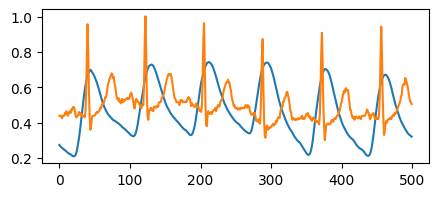

In [13]:
formatting_paths = glob.glob('../00_Data/01_PPG2ECG/02_Formatting/01_BIDMC/*.npy')
data_dict = np.load(formatting_paths[-3000], allow_pickle=True).item()

plt.figure(figsize=(5, 2))
plt.plot(data_dict['PPG']['sig'])
plt.plot(data_dict['ECG']['sig'])

## 02. CapnoBase

In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

- load datapaths

In [2]:
datapaths = glob.glob('../00_Data/01_PPG2ECG/01_Original/02_CapnoBase/data/csv/*_8min_signal.csv')

- processing

In [5]:
origin_sampling_rate = 300
crop_time_len = 4
crop_window_size = origin_sampling_rate * crop_time_len

In [20]:
for path in tqdm(datapaths, total=len(datapaths)):
    data = pd.read_csv(path)
    
    origin_ppg = data['pleth_y'].copy().values
    origin_ecg = data['ecg_y'].copy().values

    num_crop_iter = len(origin_ppg) // crop_window_size
    for i in range(num_crop_iter):
        crop_ppg = origin_ppg[i *  crop_window_size : (i+1) * crop_window_size].copy() / 10
        crop_ecg = origin_ecg[i *  crop_window_size : (i+1) * crop_window_size].copy() / 10

        ppg_check, ecg_check = crop_ppg.sum(), crop_ecg.sum()
        if np.isnan(ppg_check) == False and np.isnan(ecg_check) == False:
            data_dict = {}
            data_dict['PPG'] = {}
            data_dict['PPG']['sig_fs'] = origin_sampling_rate
            data_dict['PPG']['sig_len'] = len(crop_ppg)
            data_dict['PPG']['sig'] = crop_ppg

            data_dict['ECG'] = {}
            data_dict['ECG']['sig_fs'] = origin_sampling_rate
            data_dict['ECG']['sig_len'] = len(crop_ecg)
            data_dict['ECG']['sig'] = crop_ecg

            filename = path.split('\\')[-1].split('.')[0] + '_' + str(i+1).zfill(6) + '.npy'
            savepath = '../00_Data/01_PPG2ECG/02_Formatting/02_CapnoBase/' + filename
            np.save(savepath, data_dict)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:07<00:00,  5.66it/s]


- 시각화 확인

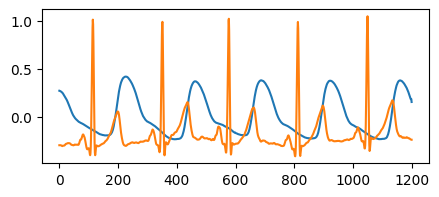

In [27]:
formatting_paths = glob.glob('../00_Data/01_PPG2ECG/02_Formatting/02_CapnoBase/*.npy')
data_dict = np.load(formatting_paths[-300], allow_pickle=True).item()

plt.figure(figsize=(5, 2))
plt.plot(data_dict['PPG']['sig'])
plt.plot(data_dict['ECG']['sig'])

In [28]:
len(formatting_paths)

5040

## 03. DaLia

In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from tqdm import tqdm

- 필요 함수

In [2]:
def load_pickle(path):
    with open(file=path, mode='rb') as f:
        data = pickle.load(f, encoding='latin1')
    return data

- load datapaths

In [3]:
datapaths = glob.glob('../00_Data/01_PPG2ECG/01_Original/03_DaLia/S*/*.pkl')

- process

In [6]:
origin_ppg_sampling_rate = 64
origin_ecg_sampling_rate = 700
crop_time_len = 4

ppg_crop_window_size = origin_ppg_sampling_rate * crop_time_len
ecg_crop_window_size = origin_ecg_sampling_rate * crop_time_len

In [7]:
for path in tqdm(datapaths, total=len(datapaths)):
    data = load_pickle(path)

    origin_ppg = data['signal']['wrist']['BVP'].copy()
    origin_ecg  = data['signal']['chest']['ECG'].copy()

    num_crop_iter = len(origin_ppg) // ppg_crop_window_size
    for i in range(num_crop_iter):
        crop_ppg = origin_ppg[i *  ppg_crop_window_size : (i+1) * ppg_crop_window_size].copy() / 1000
        crop_ecg = origin_ecg[i *  ecg_crop_window_size : (i+1) * ecg_crop_window_size].copy()

        ppg_check, ecg_check = crop_ppg.sum(), crop_ecg.sum()
        if np.isnan(ppg_check) == False and np.isnan(ecg_check) == False:
            data_dict = {}
            data_dict['PPG'] = {}
            data_dict['PPG']['sig_fs'] = origin_ppg_sampling_rate
            data_dict['PPG']['sig_len'] = len(crop_ppg)
            data_dict['PPG']['sig'] = crop_ppg

            data_dict['ECG'] = {}
            data_dict['ECG']['sig_fs'] = origin_ecg_sampling_rate
            data_dict['ECG']['sig_len'] = len(crop_ecg)
            data_dict['ECG']['sig'] = crop_ecg

            filename = path.split('\\')[-1].split('.')[0] + '_' + str(i+1).zfill(7) + '.npy'
            savepath = '../00_Data/01_PPG2ECG/02_Formatting/03_DaLia/' + filename
            np.save(savepath, data_dict)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [01:38<00:00,  6.55s/it]


- 시각화 확인

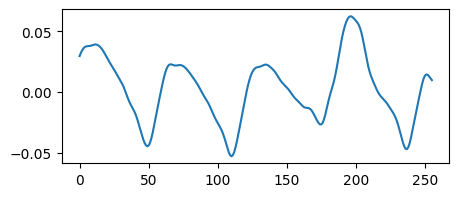

In [15]:
formatting_paths = glob.glob('../00_Data/01_PPG2ECG/02_Formatting/03_DaLia/*.npy')
data_dict = np.load(formatting_paths[200], allow_pickle=True).item()

plt.figure(figsize=(5, 2))
plt.plot(data_dict['PPG']['sig'])

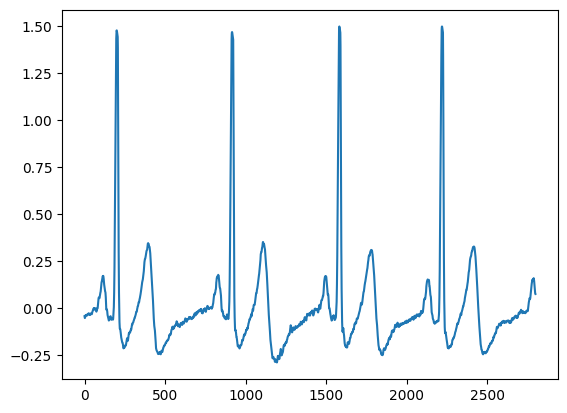

In [16]:
plt.plot(data_dict['ECG']['sig'])

In [17]:
len(formatting_paths)

32368

## 04. WESAD

In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from tqdm import tqdm

- 필요 함수

In [2]:
def load_pickle(path):
    with open(file=path, mode='rb') as f:
        data = pickle.load(f, encoding='latin1')
    return data

- load datapaths

In [3]:
datapaths = glob.glob('../00_Data/01_PPG2ECG/01_Original/04_WESAD/S*/*.pkl')

- process

In [4]:
origin_ppg_sampling_rate = 64
origin_ecg_sampling_rate = 700
crop_time_len = 4

ppg_crop_window_size = origin_ppg_sampling_rate * crop_time_len
ecg_crop_window_size = origin_ecg_sampling_rate * crop_time_len

In [5]:
for path in tqdm(datapaths, total=len(datapaths)):
    data = load_pickle(path)

    origin_ppg = data['signal']['wrist']['BVP'].copy()
    origin_ecg  = data['signal']['chest']['ECG'].copy()

    num_crop_iter = len(origin_ppg) // ppg_crop_window_size
    for i in range(num_crop_iter):
        crop_ppg = origin_ppg[i *  ppg_crop_window_size : (i+1) * ppg_crop_window_size].copy() / 100
        crop_ecg = origin_ecg[i *  ecg_crop_window_size : (i+1) * ecg_crop_window_size].copy()

        ppg_check, ecg_check = crop_ppg.sum(), crop_ecg.sum()
        if np.isnan(ppg_check) == False and np.isnan(ecg_check) == False:
            data_dict = {}
            data_dict['PPG'] = {}
            data_dict['PPG']['sig_fs'] = origin_ppg_sampling_rate
            data_dict['PPG']['sig_len'] = len(crop_ppg)
            data_dict['PPG']['sig'] = crop_ppg

            data_dict['ECG'] = {}
            data_dict['ECG']['sig_fs'] = origin_ecg_sampling_rate
            data_dict['ECG']['sig_len'] = len(crop_ecg)
            data_dict['ECG']['sig'] = crop_ecg

            filename = path.split('\\')[-1].split('.')[0] + '_' + str(i+1).zfill(7) + '.npy'
            savepath = '../00_Data/01_PPG2ECG/02_Formatting/04_WESAD/' + filename
            np.save(savepath, data_dict)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [01:10<00:00,  4.67s/it]


- 시각화 확인

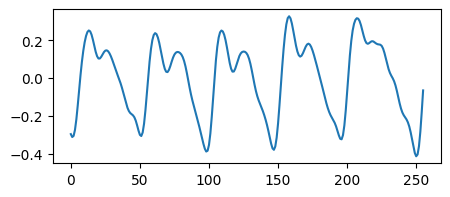

In [10]:
formatting_paths = glob.glob('../00_Data/01_PPG2ECG/02_Formatting/04_WESAD/*.npy')
data_dict = np.load(formatting_paths[-100], allow_pickle=True).item()

plt.figure(figsize=(5, 2))
plt.plot(data_dict['PPG']['sig'])

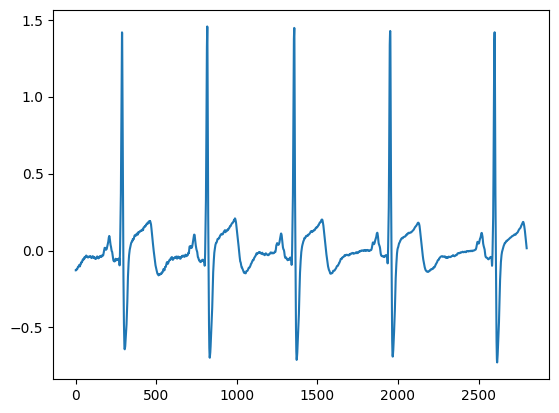

In [11]:
plt.plot(data_dict['ECG']['sig'])

In [12]:
len(formatting_paths)

21711